In [1]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/d5/b5/70bb98ee38ce532ee29fab76fb668382291fe6e1aa69a8c1ac7e6bc108e7/yfinance-0.2.38-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/315.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/315.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/315.3 kB ? eta -:--:--
     ---- -------------------------------- 41.0/315.3 kB 487.6 kB/s eta 0:00:01
     ------------------------ ------------- 204.8/315.3 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 315.3/315.3 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requi

In [8]:
import yfinance as yf
import pandas as pd

def download_data(ticker_symbols, start_date, end_date):
    # Initialize an empty DataFrame to store adjusted close data
    data = pd.DataFrame()

    # Loop through each ticker symbol
    for ticker in ticker_symbols:
        # Fetch data
        stock_data = yf.Ticker(ticker)
        hist_data = stock_data.history(start=start_date, end=end_date)['Close']  # Fetch only the 'Close' data

        # Rename the column to the ticker symbol
        hist_data.rename(ticker, inplace=True)

        # Concatenate to the main DataFrame
        if data.empty:
            data = hist_data
        else:
            data = pd.concat([data, hist_data], axis=1)

    return data

def remove_time_from_index(data):
    # Convert DateTime index to date only
    data.index = data.index.date
    return data


# List of ticker symbols for the companies you mentioned
ticker_symbols = ['^GSPC', 'MSFT', 'BRK-B', 'IWM', 'CVS', 'WBA', 'ADBE', 'NVDA', 'AMD', 'INTC', 'CSCO']

# Example usage
start_date = '2018-04-01'
end_date = '2023-04-21'
stock_data = download_data(ticker_symbols, start_date, end_date)

# Remove time from index
date_only_index_data = remove_time_from_index(stock_data)

df = date_only_index_data
print(stock_data.head())


# # Optionally, save the data to a CSV file
# sp500_data.to_csv('C:/Users/adi22/Downloads/SP500_Historical_Data.csv')


                  ^GSPC       MSFT       BRK-B         IWM        CVS  \
2018-04-02  2581.879883  82.862846  195.000000  136.982681  50.741966   
2018-04-03  2614.449951  83.976807  197.960007  138.943146  52.022160   
2018-04-04  2644.689941  86.429382  200.110001  140.709396  53.435356   
2018-04-05  2662.840088  86.476173  200.850006  141.874573  53.751259   
2018-04-06  2604.469971  84.463577  195.490005  139.044846  52.687183   

                  WBA        ADBE       NVDA    AMD       INTC       CSCO  
2018-04-02  48.870487  212.279999  54.712086   9.53  41.778042  33.912006  
2018-04-03  48.924702  215.929993  55.776382   9.55  42.486881  34.217960  
2018-04-04  50.737022  225.050003  55.996677   9.77  42.691845  34.342999  
2018-04-05  50.070957  223.539993  54.793770  10.02  43.024910  34.859814  
2018-04-06  49.157055  218.610001  53.029026   9.61  41.667027  33.951225  


In [14]:
import datetime 

# sp500_data.reset_index(inplace=True)
# sp500_data.columns
# sp500_data['Date'] = sp500_data['Date'].astype('datetime64')
sp500_data['Date'] = pd.to_datetime(sp500_data['Date']).dt.normalize()

print(sp500_data)


                          Date         Open         High          Low  \
0    2000-01-03 00:00:00-05:00  1469.250000  1478.000000  1438.359985   
1    2000-01-04 00:00:00-05:00  1455.219971  1455.219971  1397.430054   
2    2000-01-05 00:00:00-05:00  1399.420044  1413.270020  1377.680054   
3    2000-01-06 00:00:00-05:00  1402.109985  1411.900024  1392.099976   
4    2000-01-07 00:00:00-05:00  1403.449951  1441.469971  1400.729980   
...                        ...          ...          ...          ...   
6108 2024-04-15 00:00:00-04:00  5149.669922  5168.430176  5052.470215   
6109 2024-04-16 00:00:00-04:00  5064.589844  5079.839844  5039.830078   
6110 2024-04-17 00:00:00-04:00  5068.970215  5077.959961  5007.250000   
6111 2024-04-18 00:00:00-04:00  5031.520020  5056.660156  5001.890137   
6112 2024-04-19 00:00:00-04:00  5005.439941  5019.020020  4953.560059   

            Close      Volume  Dividends  Stock Splits  
0     1455.219971   931800000        0.0           0.0  
1     139

In [18]:
sp_df = pd.read_csv(r"C:\Users\adi22\Downloads\SP500_Historical_Data_Cleaned.csv")
rus_df = pd.read_csv(r"C:\Users\adi22\Downloads\RUT.csv")
sp_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000,0.0,0.0
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,0.0,0.0
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,0.0,0.0
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.0,0.0
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.0,0.0


In [19]:
sp_df.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
sp_df

,Date,Open,High,Low,Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000
...,...,...,...,...,...,...
6108,2024-04-15,5149.669922,5168.430176,5052.470215,5061.819824,3950210000
6109,2024-04-16,5064.589844,5079.839844,5039.830078,5051.410156,4006200000
6110,2024-04-17,5068.970215,5077.959961,5007.250000,5022.209961,3596130000
6111,2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,3619760000


In [20]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


# Calculate the spread
# spread = sp_df['Close'] - rus_df['Close']
ratio = rus_df['Close']/sp_df['Close']

# Perform Dickey-Fuller test
result = adfuller(ratio, autolag='AIC')  # Auto-lag determines the lag length based on information criterion

# Output results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpreting the results
if result[1] < 0.05:
    print("The spread series is stationary.")
else:
    print("The spread series is not stationary.")


ADF Statistic: -2.271266
p-value: 0.181403
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The spread series is not stationary.


In [87]:
gm_df = pd.read_csv(r"C:\Users\adi22\Downloads\GM (1).csv")
f_df = pd.read_csv(r"C:\Users\adi22\Downloads\F (1).csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-22,40.000000,40.099998,39.490002,39.500000,37.141655,7203800
1,2019-04-23,39.400002,39.840000,39.180000,39.830002,37.451958,9507500
2,2019-04-24,39.509998,39.889999,39.369999,39.720001,37.348526,5564700
3,2019-04-25,39.520000,39.720001,38.950001,39.110001,36.774944,8154600
4,2019-04-26,40.049999,40.099998,39.439999,39.680000,37.310913,11830500
...,...,...,...,...,...,...,...
1255,2024-04-16,42.490002,42.919998,42.130001,42.660000,42.660000,12384900
1256,2024-04-17,42.910000,43.160000,42.290001,42.459999,42.459999,10663300
1257,2024-04-18,42.770000,42.840000,42.009998,42.439999,42.439999,14180500
1258,2024-04-19,42.509998,42.959999,42.189999,42.369999,42.369999,15469300


In [97]:
# Calculate the spread
spread = gm_df['Close'] - f_df['Close']
# ratio = gm_df['Close']/f_df['Close']

# Perform Dickey-Fuller test
result = adfuller(spread, autolag='AIC')  # Auto-lag determines the lag length based on information criterion

# Output results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpreting the results
if result[1] < 0.05:
    print("The spread series is stationary.")
else:
    print("The spread series is not stationary.")


ADF Statistic: -1.644064
p-value: 0.460138
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
The spread series is not stationary.


In [76]:
cvs_df = pd.read_csv(r"C:\Users\adi22\Downloads\CVS (1).csv")
wba_df = pd.read_csv(r"C:\Users\adi22\Downloads\WBA.csv")

In [47]:
# Calculate the spread
# spread = cvs_df['Close'] - wba_df['Close']
ratio = wba_df['Close']/cvs_df['Close']
# Perform Dickey-Fuller test
result = adfuller(ratio, autolag='AIC')  # Auto-lag determines the lag length based on information criterion

# Output results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpreting the results
if result[1] < 0.05:
    print("The spread series is stationary.")
else:
    print("The spread series is not stationary.")


ADF Statistic: -0.934649
p-value: 0.776348
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The spread series is not stationary.


In [146]:
msft_df = pd.read_csv(r"C:\Users\adi22\Downloads\MSFT (3).csv")
bskb_df = pd.read_csv(r"C:\Users\adi22\Downloads\BRK-B (3).csv")
msft_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/25/2022,273.290009,281.109985,270.769989,280.720001,275.729797,35678900.0
1,4/26/2022,277.500000,278.359985,270.000000,270.220001,265.416443,46518400.0
2,4/27/2022,282.100006,290.970001,279.160004,283.220001,278.185425,63477700.0
3,4/28/2022,285.190002,290.980011,281.459991,289.630005,284.481384,33646600.0
4,4/29/2022,288.609985,289.880005,276.500000,277.519989,272.586670,37073900.0
...,...,...,...,...,...,...,...
499,4/19/2024,404.029999,405.480011,397.769989,399.119995,399.119995,30276500.0
500,4/22/2024,400.079987,402.850006,395.750000,400.959991,400.959991,20286900.0
501,4/23/2024,404.239990,408.200012,403.059998,407.570007,407.570007,15734500.0
502,4/24/2024,409.559998,412.470001,406.779999,409.059998,409.059998,14997700.0


In [147]:
# Calculate the spread
spread = bskb_df['Adj Close'] - msft_df['Adj Close']
# ratio = bskb_df['Adj Close']/msft_df['Adj Close']
# Perform Dickey-Fuller test
result = adfuller(spread, autolag='AIC')  # Auto-lag determines the lag length based on information criterion

# Output results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpreting the results
if result[1] < 0.05:
    print("The spread series is stationary.")
else:
    print("The spread series is not stationary.")

    
# Use ratio instead of spreads for the pair trading strategy.
# Berkshire Hathaway and Microsoft

ADF Statistic: nan
p-value: nan
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
The spread series is not stationary.


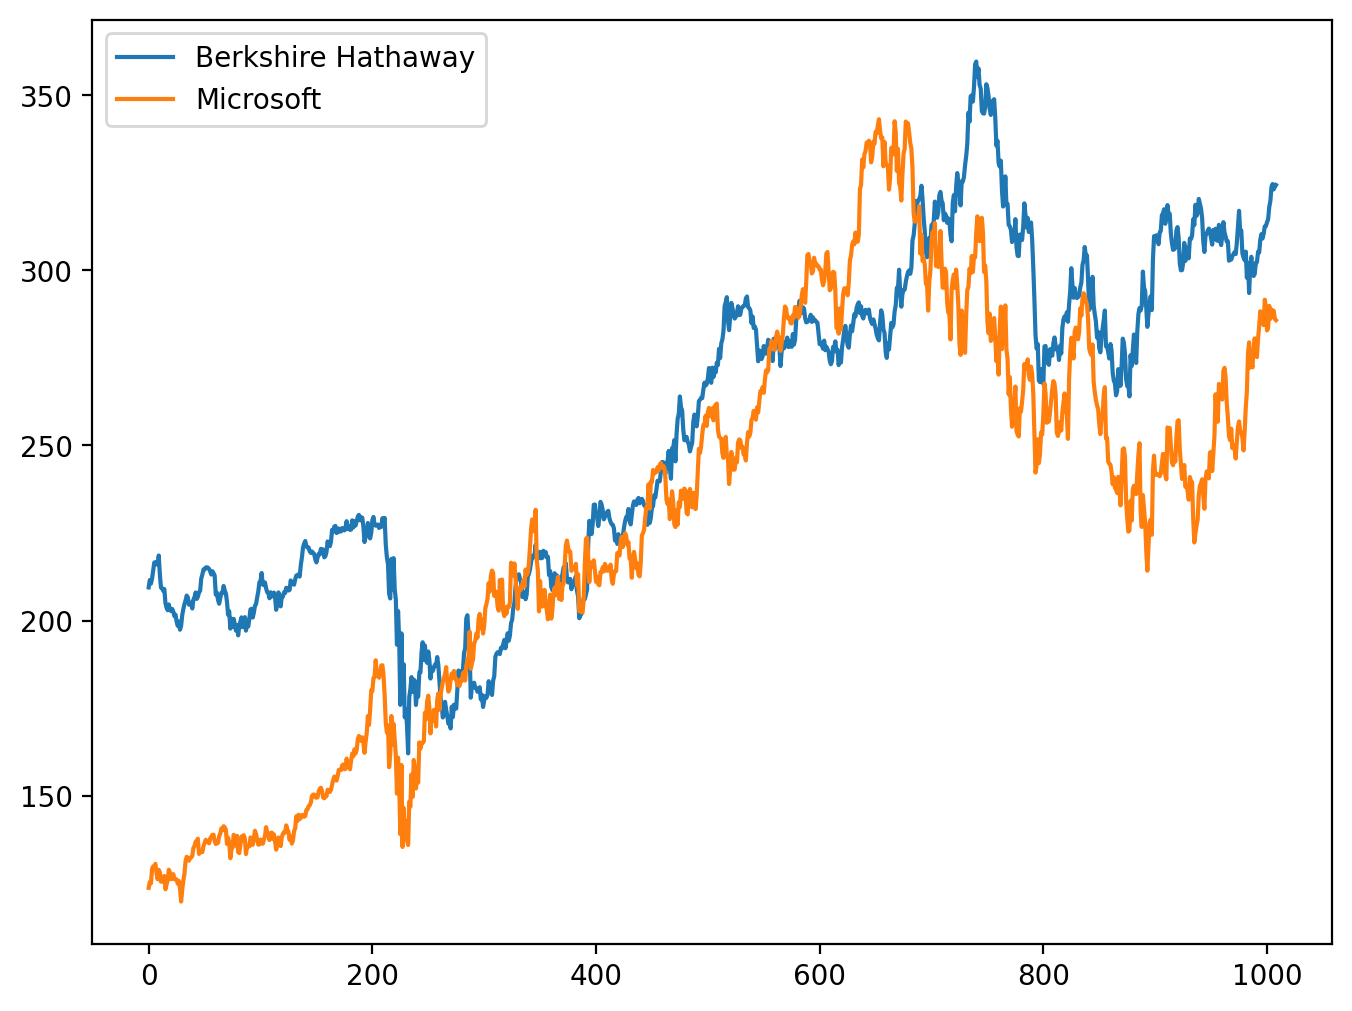

In [130]:
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
figure(figsize=(8,6), dpi=200)
plt.plot(bskb_df['Adj Close'], label="Berkshire Hathaway")
plt.plot(msft_df['Adj Close'], label = "Microsoft")
plt.legend()

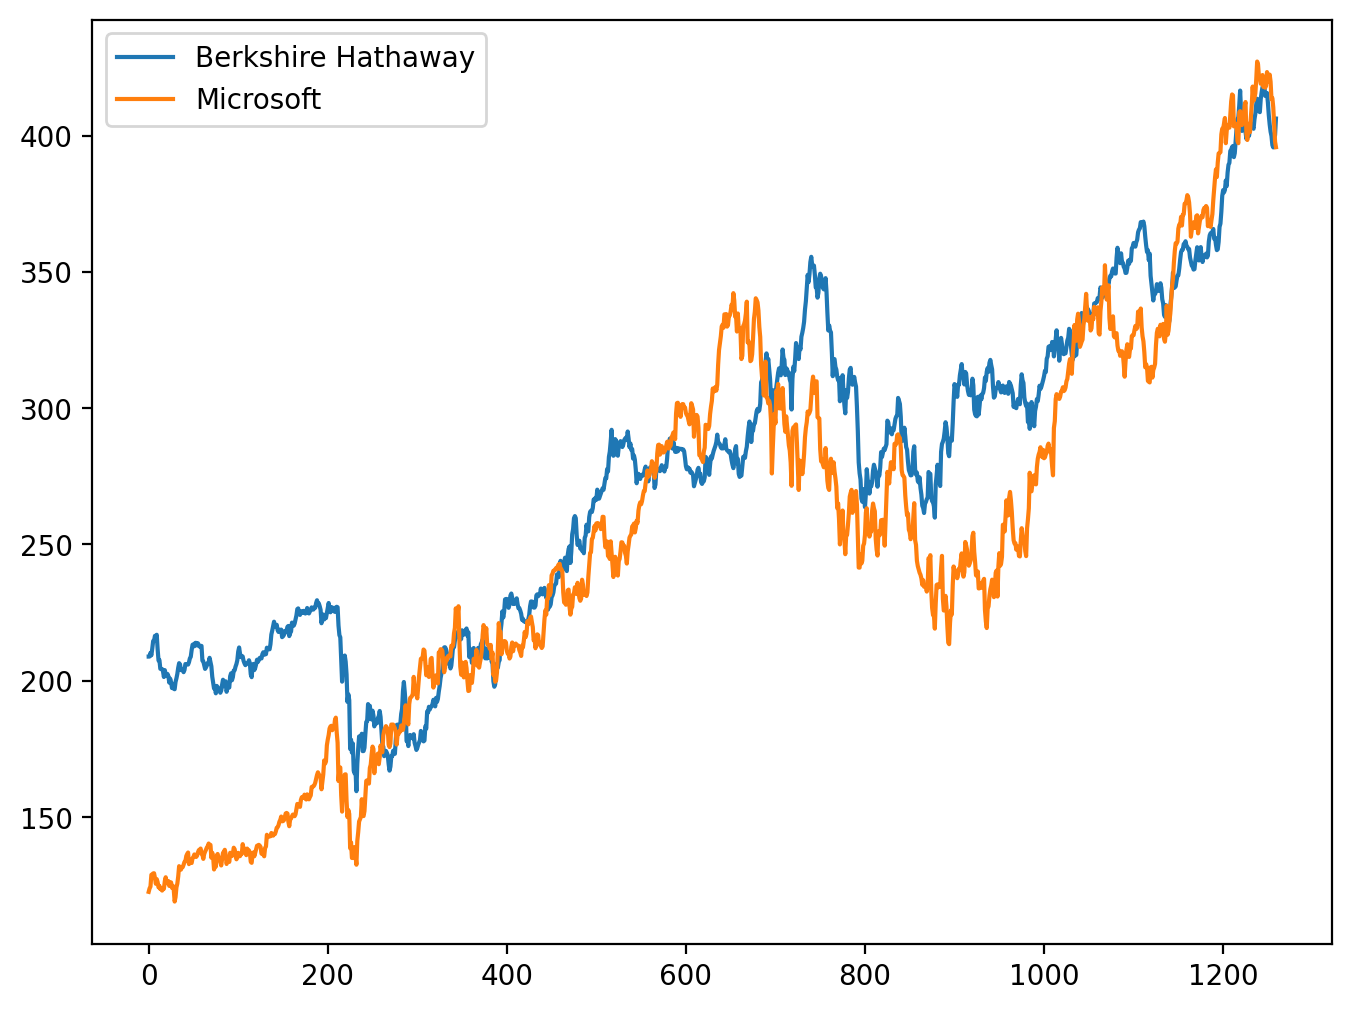

In [108]:
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
figure(figsize=(8,6), dpi=200)
plt.plot(bskb_df['Low'], label="Berkshire Hathaway")
plt.plot(msft_df['Low'], label = "Microsoft")
plt.legend()

In [110]:
msft_df.drop(columns=['Volume'], inplace=True)

,Date,Open,High,Low,Close,Adj Close
0,2019-04-22,122.620003,124.000000,122.570000,123.760002,117.806198
1,2019-04-23,124.099998,125.580002,123.830002,125.440002,119.405373
2,2019-04-24,125.790001,125.849998,124.519997,125.010002,118.996063
3,2019-04-25,130.059998,131.369995,128.830002,129.149994,122.936890
4,2019-04-26,129.699997,130.520004,129.020004,129.889999,123.641312
...,...,...,...,...,...,...
1255,2024-04-16,414.570007,418.399994,413.730011,414.579987,414.579987
1256,2024-04-17,417.250000,418.880005,410.329987,411.839996,411.839996
1257,2024-04-18,410.630005,411.890015,403.950012,404.269989,404.269989
1258,2024-04-19,404.029999,405.480011,397.769989,399.119995,399.119995


In [115]:
msft_df['Daily Returns'] = msft_df['Adj Close'].pct_change(1)


,Date,Open,High,Low,Close,Adj Close,Daily Return,Daily Returns
0,2019-04-22,122.620003,124.000000,122.570000,123.760002,117.806198,NaN,NaN
1,2019-04-23,124.099998,125.580002,123.830002,125.440002,119.405373,0.013575,0.013575
2,2019-04-24,125.790001,125.849998,124.519997,125.010002,118.996063,-0.003428,-0.003428
3,2019-04-25,130.059998,131.369995,128.830002,129.149994,122.936890,0.033117,0.033117
4,2019-04-26,129.699997,130.520004,129.020004,129.889999,123.641312,0.005730,0.005730
...,...,...,...,...,...,...,...,...
1255,2024-04-16,414.570007,418.399994,413.730011,414.579987,414.579987,0.002272,0.002272
1256,2024-04-17,417.250000,418.880005,410.329987,411.839996,411.839996,-0.006609,-0.006609
1257,2024-04-18,410.630005,411.890015,403.950012,404.269989,404.269989,-0.018381,-0.018381
1258,2024-04-19,404.029999,405.480011,397.769989,399.119995,399.119995,-0.012739,-0.012739


In [119]:
msft_df.drop(columns=['Daily Return'], inplace=True)

In [120]:
msft_df['10 Day Returns'] = msft_df['Adj Close'].pct_change(10)
msft_df

,Date,Open,High,Low,Close,Adj Close,Daily Returns,10 Day Returns
0,2019-04-22,122.620003,124.000000,122.570000,123.760002,117.806198,NaN,NaN
1,2019-04-23,124.099998,125.580002,123.830002,125.440002,119.405373,0.013575,NaN
2,2019-04-24,125.790001,125.849998,124.519997,125.010002,118.996063,-0.003428,NaN
3,2019-04-25,130.059998,131.369995,128.830002,129.149994,122.936890,0.033117,NaN
4,2019-04-26,129.699997,130.520004,129.020004,129.889999,123.641312,0.005730,NaN
...,...,...,...,...,...,...,...,...
1255,2024-04-16,414.570007,418.399994,413.730011,414.579987,414.579987,0.002272,-0.016278
1256,2024-04-17,417.250000,418.880005,410.329987,411.839996,411.839996,-0.006609,-0.020478
1257,2024-04-18,410.630005,411.890015,403.950012,404.269989,404.269989,-0.018381,-0.032569
1258,2024-04-19,404.029999,405.480011,397.769989,399.119995,399.119995,-0.012739,-0.062042


In [124]:
import pandas as pd

# Assuming df is your DataFrame and 'E' is your column with data
# Load your data
# df = pd.read_csv('your_data.csv')

# Define the window size
window_size = 30

# Calculate rolling mean and standard deviation, shift for alignment
rolling_mean = msft_df['10 Day Returns'].rolling(window=window_size).mean().shift(-window_size + 1)
rolling_std = msft_df['10 Day Returns'].rolling(window=window_size).std().shift(-window_size + 1)

# Standardize the data
msft_df['Z10'] = (msft_df['10 Day Returns'] - rolling_mean) / rolling_std

# Optionally, remove NaN values which will appear at the end of the DataFrame because of shifting
# df.dropna(subset=['Standardized_E'], inplace=True)
msft_df.head(20)
# Display the results
# print(df[['E', 'Standardized_E']])


,Date,Open,High,Low,Close,Adj Close,Daily Returns,10 Day Returns,Z10
0,2019-04-22,122.620003,124.000000,122.570000,123.760002,117.806198,NaN,NaN,NaN
1,2019-04-23,124.099998,125.580002,123.830002,125.440002,119.405373,0.013575,NaN,NaN
2,2019-04-24,125.790001,125.849998,124.519997,125.010002,118.996063,-0.003428,NaN,NaN
3,2019-04-25,130.059998,131.369995,128.830002,129.149994,122.936890,0.033117,NaN,NaN
4,2019-04-26,129.699997,130.520004,129.020004,129.889999,123.641312,0.005730,NaN,NaN
5,2019-04-29,129.899994,130.179993,129.350006,129.770004,123.527092,-0.000924,NaN,NaN
6,2019-04-30,129.809998,130.699997,129.389999,130.600006,124.317146,0.006396,NaN,NaN
7,2019-05-01,130.529999,130.649994,127.699997,127.879997,121.728012,-0.020827,NaN,NaN
8,2019-05-02,127.980003,128.000000,125.519997,126.209999,120.138329,-0.013059,NaN,NaN
9,2019-05-03,127.360001,129.429993,127.250000,128.899994,122.698921,0.021314,NaN,NaN


In [125]:
msft_df.drop(columns=['Z10'], inplace=True)
msft_df

,Date,Open,High,Low,Close,Adj Close,Daily Returns,10 Day Returns
0,2019-04-22,122.620003,124.000000,122.570000,123.760002,117.806198,NaN,NaN
1,2019-04-23,124.099998,125.580002,123.830002,125.440002,119.405373,0.013575,NaN
2,2019-04-24,125.790001,125.849998,124.519997,125.010002,118.996063,-0.003428,NaN
3,2019-04-25,130.059998,131.369995,128.830002,129.149994,122.936890,0.033117,NaN
4,2019-04-26,129.699997,130.520004,129.020004,129.889999,123.641312,0.005730,NaN
...,...,...,...,...,...,...,...,...
1255,2024-04-16,414.570007,418.399994,413.730011,414.579987,414.579987,0.002272,-0.016278
1256,2024-04-17,417.250000,418.880005,410.329987,411.839996,411.839996,-0.006609,-0.020478
1257,2024-04-18,410.630005,411.890015,403.950012,404.269989,404.269989,-0.018381,-0.032569
1258,2024-04-19,404.029999,405.480011,397.769989,399.119995,399.119995,-0.012739,-0.062042


In [19]:
from sklearn.model_selection import train_test_split
# Splitting data into train and test
df.dropna()
train_df, test_df = train_test_split(df, test_size=0.8, shuffle=False)
# quick view of head and tail of train set
train_df.head()

,^GSPC,MSFT,BRK-B,IWM,CVS,WBA,ADBE,NVDA,AMD,INTC,CSCO
2018-04-02,2581.879883,82.862846,195.000000,136.982681,50.741966,48.870487,212.279999,54.712086,9.53,41.778042,33.912006
2018-04-03,2614.449951,83.976807,197.960007,138.943146,52.022160,48.924702,215.929993,55.776382,9.55,42.486881,34.217960
2018-04-04,2644.689941,86.429382,200.110001,140.709396,53.435356,50.737022,225.050003,55.996677,9.77,42.691845,34.342999
2018-04-05,2662.840088,86.476173,200.850006,141.874573,53.751259,50.070957,223.539993,54.793770,10.02,43.024910,34.859814
2018-04-06,2604.469971,84.463577,195.490005,139.044846,52.687183,49.157055,218.610001,53.029026,9.61,41.667027,33.951225


Text(0.5, 1.0, 'Assets Correlation Matrix')

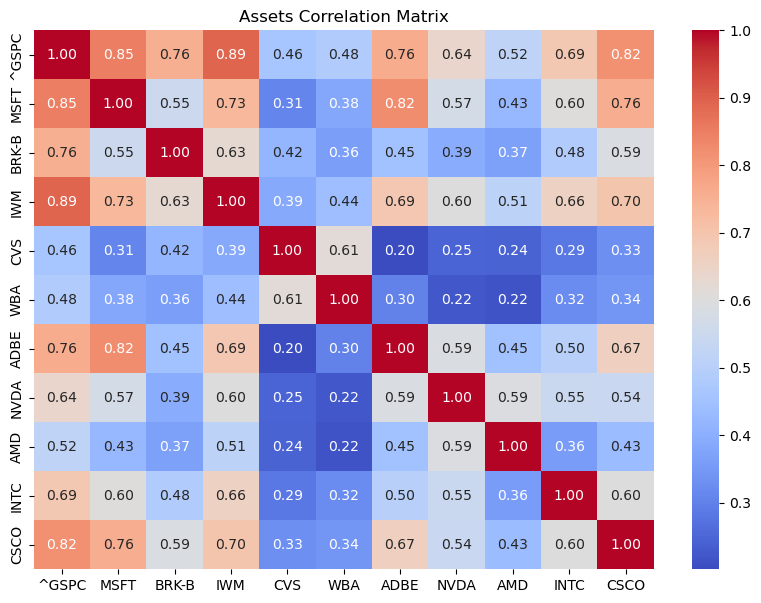

In [20]:
# Pearson correlation to get the basic idea about the relationship
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(train_df.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')
# plt.savefig('images/chart1', dpi=300)

[('CVS', 'INTC'), ('ADBE', 'AMD')]


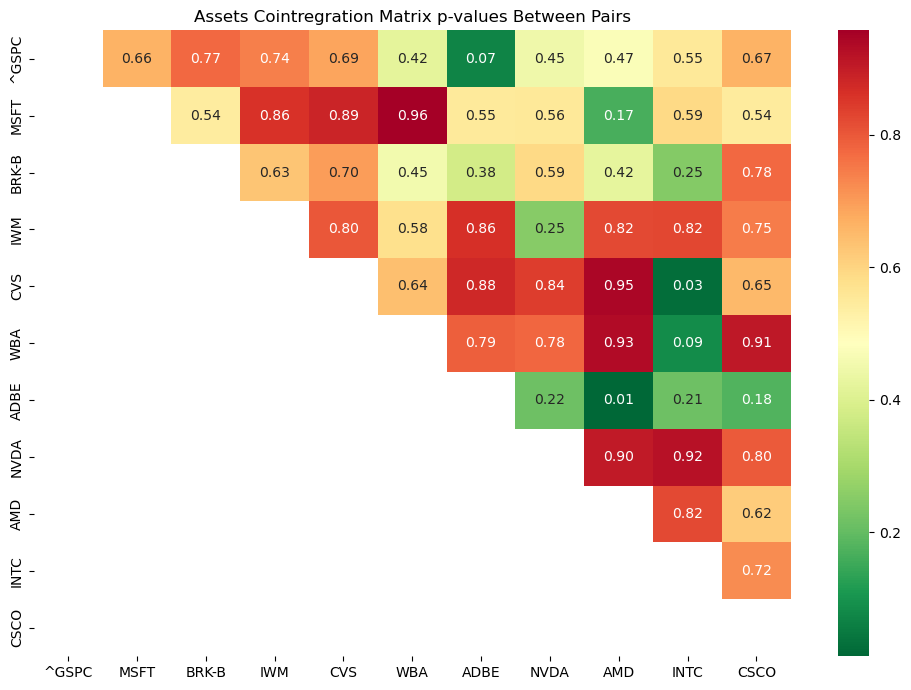

In [21]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

# function to find cointegrated pairs
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(train_df)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = train_df.columns,
                yticklabels = train_df.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointregration Matrix p-values Between Pairs')
plt.tight_layout()
# plt.savefig('images/chart2', dpi=300)


In [25]:
# Performing the stationarity test on the pairs Adobe and AMD.
# Calculate the ratio
spread = train_df['ADBE'] - train_df['AMD']
# ratio = train_df['ADBE']/train_df['AMD']
# Perform Dickey-Fuller test
result = adfuller(spread, maxlag=1)  # Auto-lag determines the lag length based on information criterion

# Output results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpreting the results
if result[1] < 0.05:
    print("The spread series is stationary.")
else:
    print("The spread series is not stationary.")

ADF Statistic: -3.213990
p-value: 0.019189
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
The spread series is stationary.


In [34]:
# Performing the stationarity test on the pairs CVS and Intel.
# Calculate the ratio
# spread = train_df['INTC'] - train_df['CVS']
ratio = train_df['CVS']/train_df['INTC']
# Perform Dickey-Fuller test
result = adfuller(ratio, maxlag=1)  # Auto-lag determines the lag length based on information criterion

# Output results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpreting the results
if result[1] < 0.05:
    print("The spread series is stationary.")
else:
    print("The spread series is not stationary.")

ADF Statistic: -0.471411
p-value: 0.897476
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
The spread series is not stationary.


In [35]:
df_new = df.drop(columns=['^GSPC', 'MSFT', 'BRK-B', 'IWM', 'CVS', 'WBA', 'NVDA', 'INTC', 'CSCO'])
df_new.to_csv('C:/Users/adi22/Downloads/adobe_amd_pairs.csv')

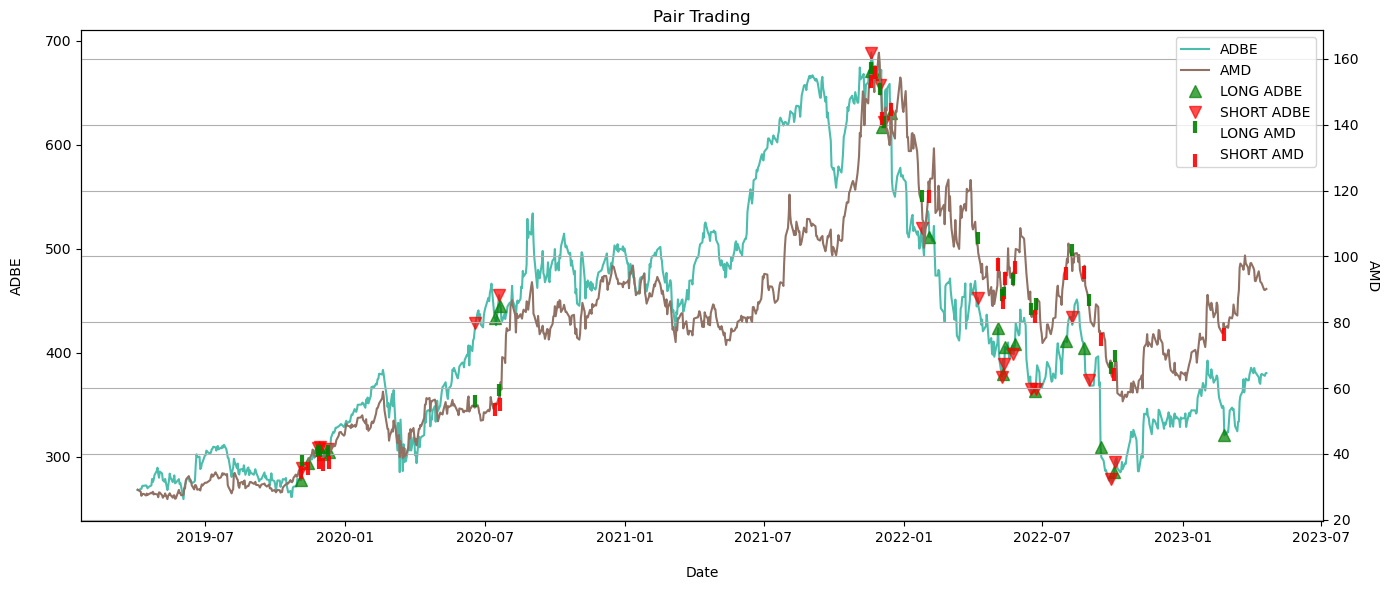

In [39]:
# calculate z-score
def zscore(series):
 return (series - series.mean()) / np.std(series)

# create a dataframe for trading signals
signals = pd.DataFrame()
signals['asset1'] = test_df[asset1] 
signals['asset2'] = test_df[asset2]
ratios = signals.asset1 / signals.asset2

# calculate z-score and define upper and lower thresholds
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

# create signal - short if z-score is greater than upper limit else long
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

# we take the first order difference to obtain portfolio position in that stock
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

# visualize trading signals and position
fig=plt.figure(figsize=(14,6))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()

#plot two different assets
l1, = bx.plot(signals['asset1'], c='#4abdac')
l2, = bx2.plot(signals['asset2'], c='#907163')
u1, = bx.plot(signals['asset1'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=0.7)
d1, = bx.plot(signals['asset1'][signals['positions1'] == -1], lw=0,marker='v',markersize=8, c='r',alpha=0.7)
u2, = bx2.plot(signals['asset2'][signals['positions2'] == 1], lw=0,marker=2,markersize=9, c='g',alpha=0.9, markeredgewidth=3)
d2, = bx2.plot(signals['asset2'][signals['positions2'] == -1], lw=0,marker=3,markersize=9, c='r',alpha=0.9,markeredgewidth=3)
bx.set_ylabel(asset1,)
bx2.set_ylabel(asset2, rotation=270)
bx.yaxis.labelpad=15
bx2.yaxis.labelpad=15
bx.set_xlabel('Date')
bx.xaxis.labelpad=15
plt.legend([l1,l2,u1,d1,u2,d2], [asset1, asset2,'LONG {}'.format(asset1),
           'SHORT {}'.format(asset1),
           'LONG {}'.format(asset2),
           'SHORT {}'.format(asset2)], loc ='best')
plt.title('Pair Trading')
plt.xlabel('Date')
plt.grid(True)

plt.tight_layout()